In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

In [ ]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [ ]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname',
               'Propertycount', 'Distance','Bedroom2', 'Bathroom', 'Car',
               'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

# missing values

In [ ]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(27244, 14)

# outlier handling

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rooms'>

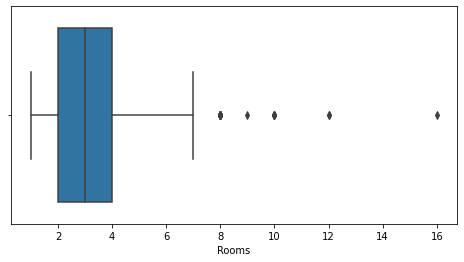

In [ ]:
import seaborn as sns
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Rooms', data=dataset, orient='h')

In [ ]:
from scipy import stats

q1 = dataset['Rooms'].quantile(q=0.25)
q3 = dataset['Rooms'].quantile(q=0.75)
IQR = q3-q1
print('1st quartile = {} \n3rd quartile range = {} \ninter quartile range = {} '
      .format(q1,q3,stats.iqr(dataset['Rooms'])))

1st quartile = 2.0 
3rd quartile range = 4.0 
inter quartile range = 2.0 


In [ ]:
lower_outlier = q1-1.5*(IQR)
upper_outlier = q3+1.5*(IQR)

print('lower outlier = ',lower_outlier)
print('uppper outlier = ',upper_outlier)

lower outlier =  -1.0
uppper outlier =  7.0


In [ ]:
print('Number of upper outlier =  ',
      dataset[dataset['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier =  ',
      dataset[dataset['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier =   23
Number of lower outlier =   0


In [ ]:
dataset.loc[(dataset['Rooms']<lower_outlier) | (dataset['Rooms']>upper_outlier),
            ['Rooms']] = dataset['Rooms'].median()

In [ ]:
print('Number of upper outlier =  ',dataset[dataset['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier =  ',dataset[dataset['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier =   0
Number of lower outlier =   0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Rooms'>

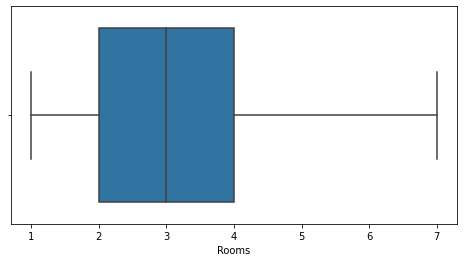

In [ ]:
import seaborn as sns
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Rooms', data=dataset, orient='h')

In [ ]:
for cols in dataset.columns[:-1]:
    if dataset[cols].dtype == object:
        continue
    else:
        Q1 = dataset[cols].quantile(q=0.25)
        Q3 = dataset[cols].quantile(q=0.75)
        iqr = Q3 - Q1

        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        dataset.loc[(dataset[cols]<low) | (dataset[cols]>high),cols] = dataset[cols].median()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='BuildingArea'>

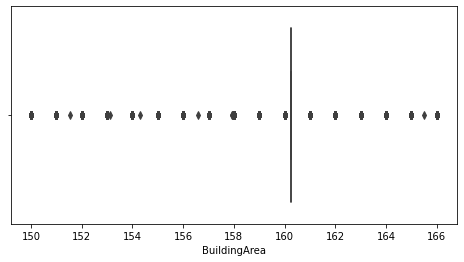

In [ ]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'BuildingArea', data=dataset, orient='h')

In [ ]:
dataset.corr()

<ipython-input-110-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
Rooms,1.000000,-0.069484,0.311482,0.554088,0.411772,0.348026,0.362793,-0.039481,0.464536
Propertycount,-0.069484,1.000000,-0.078625,-0.028384,-0.013974,-0.027420,-0.046722,0.007199,-0.010364
Distance,0.311482,-0.078625,1.000000,0.156576,0.100343,0.191976,0.344302,-0.025469,-0.167219
Bedroom2,0.554088,-0.028384,0.156576,1.000000,0.838180,0.717833,0.021490,-0.065623,0.299756
Bathroom,0.411772,-0.013974,0.100343,0.838180,1.000000,0.645191,-0.080908,-0.066235,0.275152
Car,0.348026,-0.027420,0.191976,0.717833,0.645191,1.000000,0.099695,-0.048828,0.202983
Landsize,0.362793,-0.046722,0.344302,0.021490,-0.080908,0.099695,1.000000,-0.004623,0.182581
BuildingArea,-0.039481,0.007199,-0.025469,-0.065623,-0.066235,-0.048828,-0.004623,1.000000,0.001780
Price,0.464536,-0.010364,-0.167219,0.299756,0.275152,0.202983,0.182581,0.001780,1.000000


In [ ]:
print(dataset.shape)
dataset1_num_col = dataset.drop(['Car','Suburb', 'Type', 'Method',
                                 'SellerG',
                                 'Regionname','Price'],axis = 1)
print(dataset1_num_col.shape)

dataset1_num_col.head()

(27244, 14)
(27244, 7)


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Landsize,BuildingArea
1,2,4019.0,2.5,2.0,1.0,202.0,160.2564
2,2,4019.0,2.5,2.0,1.0,156.0,160.2564
4,3,4019.0,2.5,3.0,2.0,134.0,150.0000
5,3,4019.0,2.5,3.0,2.0,94.0,160.2564
6,4,4019.0,2.5,3.0,1.0,120.0,160.2564


In [ ]:
dataset_cat = pd.get_dummies(dataset, drop_first=True)
print(dataset_cat.shape)

(27244, 713)


In [ ]:
dataset= pd.concat([dataset1_num_col,dataset_cat],axis = 1)
dataset.shape

(27244, 720)

# Data Standardization

In [ ]:
X = dataset.drop('Price',axis=1)
y= dataset['Price']
print(X.shape)
print(y.shape)

(27244, 719)
(27244,)


In [ ]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [ ]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score -8.516028849736276e+26
MSE =  3.52719747505852e+38
